#Analisando as notas em geral

In [ ]:
import pandas as pd


In [ ]:
notas = pd.read_csv('ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
...,...,...,...,...
43144,345,4865,5.0,1.004575e+09
43145,345,4874,5.0,1.004575e+09
43146,345,4878,5.0,1.013922e+09
43147,345,4881,5.0,1.010728e+09


In [ ]:
notas.head()
# Atribuição para exibir somente as cinco primeiras linhas

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [ ]:
notas.shape
#Atribuição para revelar o tamanho(shape) da tabela

(43149, 4)

In [ ]:
notas.columns = [ 'UsuarioId', 'FilmesId', 'Nota', 'Momento' ]
#Renomeação do cabeçalhos

In [ ]:
notas

,UsuarioId,FilmeId,Nota,Momento
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
...,...,...,...,...
43144,345,4865,5.0,1.004575e+09
43145,345,4874,5.0,1.004575e+09
43146,345,4878,5.0,1.013922e+09
43147,345,4881,5.0,1.010728e+09


In [ ]:
type(notas)
#Utilização para descobrir o Tipo do atributo 'Notas'

pandas.core.frame.DataFrame

In [ ]:
notas['Nota'].unique()
#Atribuição para exibir os valores de forma uníca sem repetições

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

In [ ]:
notas['Nota'].value_counts()
#Atribuição para contar os valores

4.0    12077
3.0     8435
5.0     6933
3.5     4732
4.5     3739
2.0     2853
2.5     1770
1.0     1323
1.5      690
0.5      597
Name: Nota, dtype: int64

In [ ]:
print('Media', notas['Nota'].mean())
#Atribuição para cálculo de média
print('Mediana', notas['Nota'].median())
#Atribuição para cálculo de mediana

Media 3.579526756124128
Mediana 4.0


<Axes: ylabel='Frequency'>

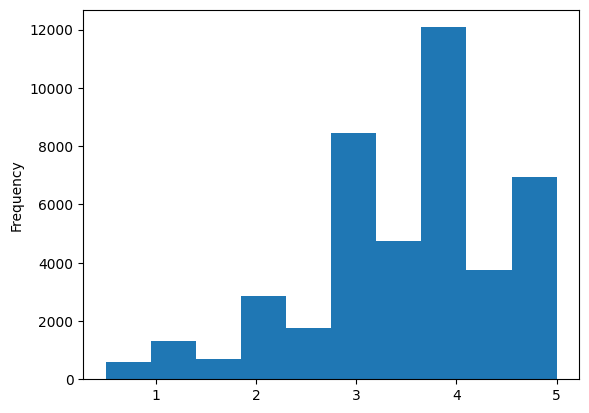

In [ ]:
notas.Nota.plot(kind='hist')

In [ ]:
notas.Nota.describe()

count    43149.000000
mean         3.579527
std          1.063310
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Nota, dtype: float64

In [ ]:
import seaborn as sns

<Axes: >

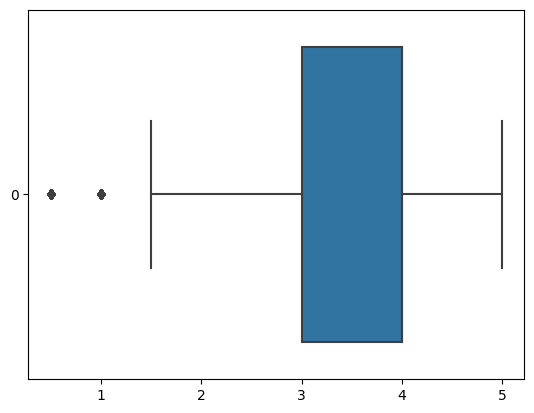

In [ ]:
sns.boxplot(notas.Nota, orient='h')

#Olhando os filmes

In [ ]:
filmes=pd.read_csv('movies.csv')
filmes.columns = 'FilmesId', 'Titulo', 'Generos'
filmes.head()

,FilmesId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,UsuarioId,FilmesId,Nota,Momento
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


#Analisando aslgumas noras específicas por filme

In [ ]:
notas.query('FilmeId==1').Nota.mean()
#Querys(perguntas)

3.9292929292929295

In [ ]:
notas.query('FilmeId==2').Nota.mean()

3.3048780487804876

In [ ]:
notas.groupby('FilmesId')
#Realisando agrupamento pelo fime

In [ ]:
medias_por_filme = notas.groupby('FilmesId').mean()['Nota']

In [ ]:
medias_por_filme.head()

FilmesId
1    3.929293
2    3.304878
3    3.125000
4    3.250000
5    3.375000
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

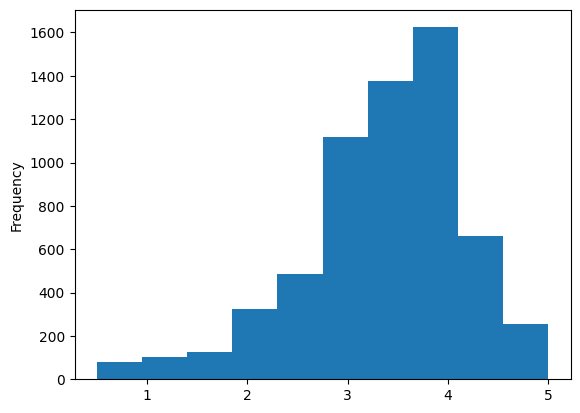

In [ ]:
medias_por_filme.plot(kind='hist')

In [ ]:
sns.boxplot(medias_por_filme,horient='h')

NameError: ignored

In [ ]:
medias_por_filme.describe()

count    6148.000000
mean        3.379520
std         0.859523
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: Nota, dtype: float64

<ipython-input-103-c99e5fbcf4e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='Nota', ylabel='Density'>

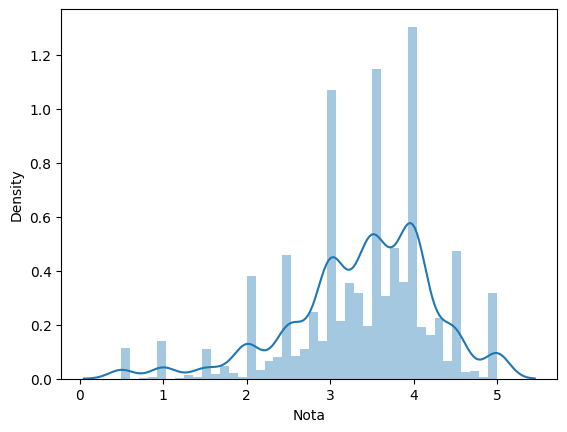

In [ ]:
sns.distplot(medias_por_filme)

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Histograma das médias dos filmes')

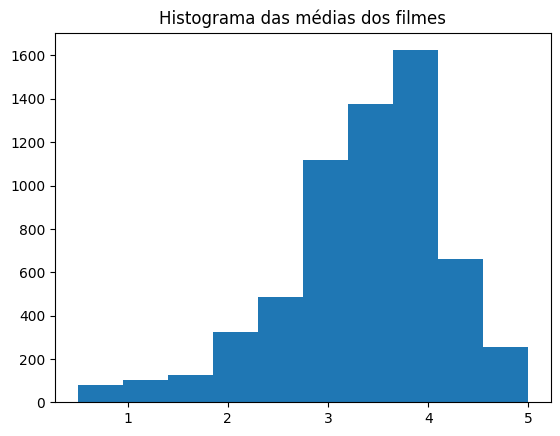

In [ ]:
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')